In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, precision_score, recall_score,
    f1_score, classification_report, roc_curve, precision_recall_curve
)


In [125]:
try:
    df = pd.read_csv('./data.csv')
except FileNotFoundError:
    raise FileNotFoundError("Error: data.csv not found. Please check the file path.")

In [126]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [127]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [129]:
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_index = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_index]
best_f1_score = f1_scores[best_index]
y_pred_threshold = (y_proba >= best_threshold).astype(int)

In [130]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Best threshold by F1 score: {best_threshold:.4f}")
print(f"Best F1 score: {best_f1_score:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision_score(y_test, y_pred_threshold):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_threshold):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_threshold):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))

Best threshold by F1 score: 0.4848
Best F1 score: 0.9767

Confusion Matrix:
 [[70  1]
 [ 1 42]]
ROC AUC Score: 0.9974
Precision: 0.9767
Recall: 0.9767
F1 Score: 0.9767

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



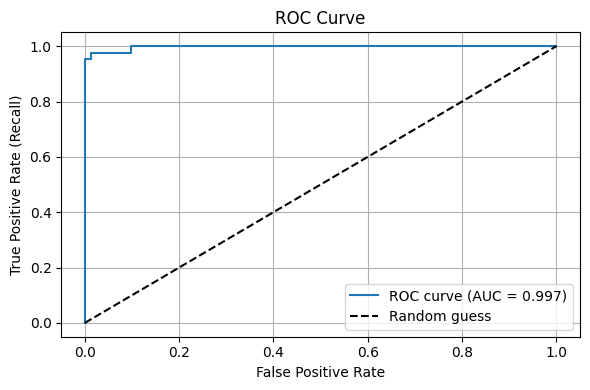

In [131]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

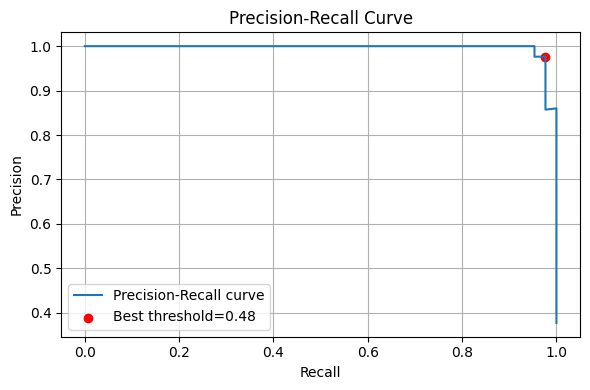

In [132]:
plt.figure(figsize=(6, 4))
plt.plot(recalls, precisions, label="Precision-Recall curve")
plt.scatter(recalls[best_index], precisions[best_index], color='red', label=f'Best threshold={best_threshold:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()